## Парсинг данных с сайта на Python

### Определения

Парсинг - это процесс сбора данных с последующей их обработкой и анализом.

Программа, которая занимается парсингом, называют - парсер.


### Условие задачи

С сайта ( https://habr.com/ru/search/ ) необходимо построить исходный набор данных (.csv или .xml). Набор данных должен включать __названия, описание, рейтинг и сферу деятельности компаний, дату публикации, а также текст статей из Интернет-ресурсов__. Подготовленный набор данных должен содержать сведения о всех номинантах конкурса. Разработанный парсер должен извлекать гиперссылки из начальной страницы с последующим обходом всех страниц по полученным ссылкам и извлечением их содержимого. Можно дополнить набор какими-либо другими данными, если они могут быть полезны для дальнейшего исследования.


### Этапы парсинга

1. Поиск данных
2. Получение информации
3. Сохранение данных

### Подключение библиотек

In [9]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
from bs4 import BeautifulSoup as bs

Beautiful Soup - это библиотека Python для извлечения данных из HTML и XML файлов. 

In [12]:
import requests

Библиотека requests является стандартным инструментом для составления HTTP-запросов в Python.

In [14]:
import pandas as pd

In [15]:
# %%
!pip install beautifulsoup4 requests numpy pandas matplotlib seaborn scikit-learn nltk gensim pyLDAvis wordcloud
!python -m nltk.downloader punkt stopwords wordnet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\V\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


### Получение информаций

In [17]:
# GET - запрос
url = 'https://habr.com/ru/all/' # страница со всеми статьями 
page = requests.get(url)

Метод __requests.get(url)__ из библиотеки requests в Python выполняет HTTP-запрос типа GET по указанному URL. Этот запрос используется для получения данных с веб-страницы или API, в нашем случае из страницы habr.

In [19]:
page.status_code

200

Если вызвать __page.status_code__, то получим статус состояния HTTP. например, 200 — успешно, 404 — страница не найдена, 500 — ошибка сервера 


In [21]:
soup = bs(page.text, 'html.parser')

__bs__ — это сокращение от BeautifulSoup, основного класса библиотеки Beautiful Soup.

__bs(page.text, 'html.parser')__ создаёт объект BeautifulSoup, который парсит HTML-код из page.text с использованием указанного парсера.

__'html.parser'__ — это встроенный парсер Python, который не требует установки дополнительных библиотек.а.

In [23]:
page.text

'<!DOCTYPE html>\n<html lang="ru">\n\n  <head>\n    <title>Все статьи подряд &#x2F; Хабр</title>\n<link rel="image_src" href="/img/habr_ru.png" data-hid="2a79c45">\n<link href="https://habr.com/ru/articles/" rel="canonical" data-hid="e3fa780">\n<link href="https://habr.com/ru/articles/" hreflang="ru" rel="alternate" data-hid="7d51b8a">\n<link href="https://habr.com/en/articles/" hreflang="en" rel="alternate" data-hid="7d51b8a">\n<meta itemprop="image" content="/img/habr_ru.png">\n<meta property="og:image" content="/img/habr_ru.png">\n<meta property="og:image:width" content="1200">\n<meta property="og:image:height" content="630">\n<meta property="aiturec:image" content="/img/habr_ru.png">\n<meta name="twitter:image" content="/img/habr_ru.png">\n<meta property="vk:image" content="/img/habr_ru.png?format=vk">\n<meta property="fb:app_id" content="444736788986613">\n<meta property="fb:pages" content="472597926099084">\n<meta name="twitter:card" content="summary_large_image">\n<meta name="tw

In [24]:
soup

<!DOCTYPE html>

<html lang="ru">
<head>
<title>Все статьи подряд / Хабр</title>
<link data-hid="2a79c45" href="/img/habr_ru.png" rel="image_src"/>
<link data-hid="e3fa780" href="https://habr.com/ru/articles/" rel="canonical"/>
<link data-hid="7d51b8a" href="https://habr.com/ru/articles/" hreflang="ru" rel="alternate"/>
<link data-hid="7d51b8a" href="https://habr.com/en/articles/" hreflang="en" rel="alternate"/>
<meta content="/img/habr_ru.png" itemprop="image"/>
<meta content="/img/habr_ru.png" property="og:image"/>
<meta content="1200" property="og:image:width"/>
<meta content="630" property="og:image:height"/>
<meta content="/img/habr_ru.png" property="aiturec:image"/>
<meta content="/img/habr_ru.png" name="twitter:image"/>
<meta content="/img/habr_ru.png?format=vk" property="vk:image"/>
<meta content="444736788986613" property="fb:app_id"/>
<meta content="472597926099084" property="fb:pages"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="@habr_com" name=

In [25]:
result_list = {'title': [], 'namecompany': [], 'description': [], 'rating': [], 'field': [], 'date': [], 'textpub': []}

### Алгоритм

In [27]:
pagenum = 1
for i in range(10):
    url = 'https://habr.com/ru/articles/page' + str(pagenum) + '/' # переход на ссылуку с определённым номером сраницы
    page = requests.get(url)
    soup = bs(page.text, 'html.parser')
    titles = soup.find_all('h2', class_='tm-title tm-title_h2')# получаем заголовки всех статей на этой странице
    
    for i in titles: 
        # переход на страницу статьи
        url = 'https://habr.com' + str(i.a.get('href')) 
        page = requests.get(url)
        soup = bs(page.text, 'html.parser')
        
        name_company = soup.find('a', class_='tm-company-snippet__title')# получаем название компаний
        desc_company = soup.find('div', class_='tm-company-snippet__description')# получаем описание компаний
        
        if (name_company is not None): #если на странице присутсвует компания
        
            result_list['title'].append(i.text) # записываем название статьи
            result_list['namecompany'].append(name_company.text) # записываем название компании
            result_list['description'].append(desc_company.text) # записываем описание компании
            
            datepub = soup.find('span', class_='tm-article-datetime-published') # находим дату публикаций
            result_list['date'].append(datepub.time['datetime'][0: 10]) # записываем дату публикаций
            
            # текст статьи
            try:
                textpub = soup.find('div', class_='article-formatted-body article-formatted-body article-formatted-body_version-2').get_text()
                textpub = textpub.replace('\n', ' ').replace('\t', ' ').replace('\xa0', ' ').replace('\u200e', ' ').replace('\r', ' ')
            except:
                textpub = soup.find('div', class_='article-formatted-body article-formatted-body article-formatted-body_version-1').get_text()
                textpub = textpub.replace('\n', ' ').replace('\t', ' ').replace('\xa0', ' ').replace('\u200e', ' ').replace('\r', ' ')
            result_list['textpub'].append(textpub)
            
            # переход на страницу компании
            url = 'https://habr.com' + str(name_company.get('href'))
            page = requests.get(url)
            soup = bs(page.text, 'html.parser')
            
            #записываем рейтинг
            rating = soup.find('span', class_='tm-votes-lever__score-counter tm-votes-lever__score-counter tm-votes-lever__score-counter_rating')
            if(rating is None):
                result_list['rating'].append('0')
            else:
                result_list['rating'].append((rating.text).strip())
               
             #записываем отрасли компаний
            fieldtext = ""
            fields = soup.find_all('a', 'tm-company-profile__categories-text')
            for field in fields:
                fieldtext = fieldtext + ((field.text).strip()) + ", "
            if (fields is None):
                result_list['field'].append(None)
            else:
                result_list['field'].append(fieldtext[0:-2])
            
    pagenum += 1

In [28]:
result_list

{'title': ['Пятница — новый выходной? Как страны тестируют четырёхдневку',
  'Патентный анализ аналоговой электроники',
  'Как прошёл Infra Meetup Wildberries & Russ',
  'Как нейросети помогают при создании кино и сериалов, и почему без человека всё ещё никак',
  'Возвращение Ubuntu Touch: как обновление дало вторую жизнь мобильной ОС',
  'От нестационарности к прогнозу: пайплайн анализа и моделирования временных рядов',
  'Архитектура как часть цифровой стратегии предприятия',
  'Топ-10 лучших бесплатных нейросетей, которые сильно упростят вашу жизнь',
  'Китайские CPU и GPU почти догнали TSMC',
  'Гайд по применению Object Lock на примере S3-объектного хранилища VK Cloud',
  'Проверка прокуратуры по КИИ: как справиться без бюджета и пройти её успешно',
  'Правильное SEO или как вернуть трафик после переезда на новый сайт',
  'Как я автоматизировал анализ логов из Kibana с помощью LLM и AI-агентов',
  'Инженеры на улицах города: идём на экскурсию с YADRO',
  'Сокращение времени на нап

In [29]:
print("Количество нулевых значений в: ")
for i in result_list:
    print( i + " - " + str(result_list[i].count(None)))

Количество нулевых значений в: 
title - 0
namecompany - 0
description - 0
rating - 0
field - 0
date - 0
textpub - 0


### Сохранение данных

In [31]:
file_name = 'habr.csv'
df = pd.DataFrame(data=result_list)
df.to_csv(file_name)

In [32]:
df.head()

,title,namecompany,description,rating,field,date,textpub
0,Пятница — новый выходной? Как страны тестируют...,SENSE,SENSE — кадровый системный интегратор,0,"Программное обеспечение, Консалтинг и поддержк...",2025-10-08,"Кофе, таски, календарь забитый встречами и ощу..."
1,Патентный анализ аналоговой электроники,Online patent,Ваш личный патентный офис,0,"Консалтинг и поддержка, Веб-сервисы",2025-10-08,Аналоговая электроника — это отрасль электрони...
2,Как прошёл Infra Meetup Wildberries & Russ,Wildberries & Russ,Компания,0,"Электронная коммерция, Веб-сервисы",2025-10-08,Три инженерных доклада о мощной инфраструктуре...
3,Как нейросети помогают при создании кино и сер...,Национальная Медиа Группа,Крупнейший в России частный медиахолдинг,0,"Веб-разработка, СМИ, Веб-сервисы",2025-10-08,"Привет, Хабр! Меня зовут Артём Орлов, я директ..."
4,Возвращение Ubuntu Touch: как обновление дало ...,МТС,Про жизнь и развитие в IT,0,"Связь и телекоммуникации, Мобильные технологии...",2025-10-08,Ubuntu Touch — мобильная версия Ubuntu для тех...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        102 non-null    object
 1   namecompany  102 non-null    object
 2   description  102 non-null    object
 3   rating       102 non-null    object
 4   field        102 non-null    object
 5   date         102 non-null    object
 6   textpub      102 non-null    object
dtypes: object(7)
memory usage: 5.7+ KB


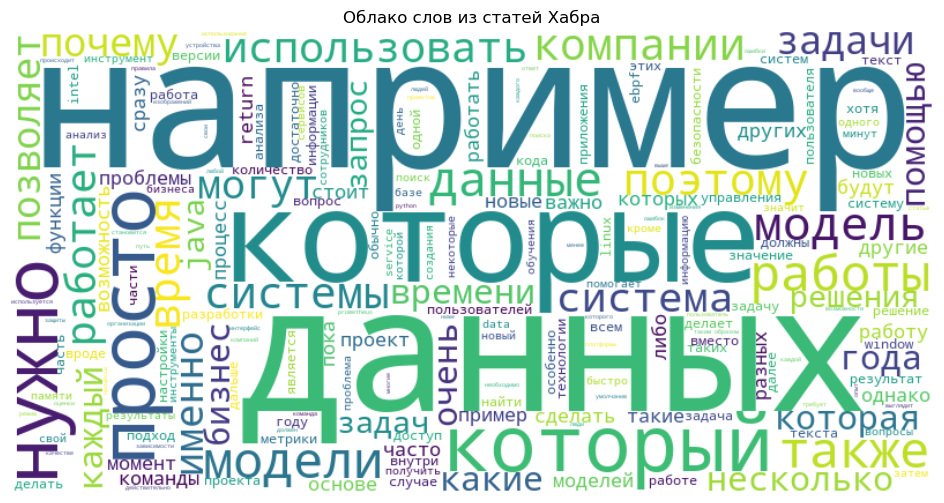

In [34]:
stop_words = stopwords.words('russian')
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^а-яА-ЯёЁa-zA-Z]', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 3]
    return ' '.join(tokens)

# Предобработка текстаа
df['processed_text'] = df['textpub'].apply(preprocess_text)
df['processed_title'] = df['title'].apply(preprocess_text)

# Визуализация облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['processed_text']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов из статей Хабра')
plt.show()

# LDA

In [36]:
texts = [text.split() for text in df['processed_text']]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

# Построение модели
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=5,
    random_state=42,
    passes=10,
    alpha='auto'
)

In [37]:
# Визуализация
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

# Вывод ключевых слов
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

Topic: 0 
Words: 0.003*"данных" + 0.003*"которые" + 0.002*"который" + 0.002*"например" + 0.002*"java" + 0.002*"просто" + 0.002*"системы" + 0.002*"также" + 0.001*"проблемы" + 0.001*"работы"

Topic: 1 
Words: 0.004*"данных" + 0.003*"navo" + 0.002*"storage" + 0.002*"данные" + 0.002*"direction" + 0.002*"например" + 0.002*"которые" + 0.002*"нужно" + 0.002*"текст" + 0.002*"data"

Topic: 2 
Words: 0.003*"service" + 0.002*"просто" + 0.002*"нужно" + 0.002*"модели" + 0.002*"size" + 0.002*"float" + 0.002*"которые" + 0.002*"данных" + 0.002*"simd" + 0.002*"open"

Topic: 3 
Words: 0.003*"например" + 0.003*"ebpf" + 0.002*"которые" + 0.002*"года" + 0.002*"модели" + 0.002*"нужно" + 0.002*"модель" + 0.002*"данных" + 0.001*"просто" + 0.001*"scout"

Topic: 4 
Words: 0.003*"например" + 0.003*"которые" + 0.002*"block" + 0.002*"данных" + 0.002*"data" + 0.002*"который" + 0.002*"file" + 0.002*"smbus" + 0.002*"window" + 0.001*"модель"



# TF-IDF

In [55]:
# Создаем TF-IDF векторизатор
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8, 
    max_features=10000,
    min_df=0.01, 
    stop_words=russian_stopwords,
    ngram_range=(1,3)
)

import time

start_time = time.time()
# ИСПРАВЛЕННАЯ СТРОКА - используем существующий столбец
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])
end_time = time.time()

print(tfidf_matrix)
print(f"Размерность матрицы: {tfidf_matrix.shape}")
print(f"Время выполнения: {end_time - start_time:.2f} секунд")

  (0, 2335)	0.04332485385043442
  (0, 2216)	0.04332485385043442
  (0, 1261)	0.03670454350932191
  (0, 777)	0.04332485385043442
  (0, 3247)	0.04057717680200921
  (0, 7009)	0.04057717680200921
  (0, 2380)	0.04332485385043442
  (0, 5093)	0.032831910216634605
  (0, 3447)	0.0262115998755221
  (0, 3844)	0.025695199038687323
  (0, 7502)	0.02520529222410674
  (0, 2334)	0.03523223666256317
  (0, 2647)	0.017674665882773135
  (0, 1219)	0.03182560256521925
  (0, 9624)	0.030084233168209403
  (0, 8482)	0.04057717680200921
  (0, 4482)	0.017894240815065604
  (0, 4925)	0.027336556119784194
  (0, 6119)	0.026757524967391495
  (0, 6973)	0.03844591290633176
  (0, 4172)	0.03523223666256317
  (0, 7277)	0.03865919899243506
  (0, 4173)	0.033956866460896705
  (0, 5701)	0.05590593854506389
  (0, 2082)	0.03091528656499815
  :	:
  (101, 6096)	0.028822709459523567
  (101, 1183)	0.056309300924883926
  (101, 7382)	0.025635500286111355
  (101, 9319)	0.03145516802386711
  (101, 3319)	0.05708264073404228
  (101, 3854)	0

In [86]:
tfidf_matrix.shape

(102, 10000)

In [90]:
top_hubs = df['field'].str.split(', ').explode().value_counts().head(5).index.tolist()
print("Выбранные хабы для классификации:", top_hubs)

def get_main_hub(hubs_str):
    if pd.isna(hubs_str):
        return 'other'
    hubs = hubs_str.split(', ')
    for hub in hubs:
        if hub in top_hubs:
            return hub
    return 'other'

df['main_hub'] = df['field'].apply(get_main_hub)

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['processed_text'])
y = df['main_hub']

print(f"\nРазмерность X: {X.shape}")
print(f"Размерность y: {y.shape}")

print("\nРаспределение классов:")
print(y.value_counts())

Выбранные хабы для классификации: ['Программное обеспечение', 'Веб-сервисы', 'Веб-разработка', 'Консалтинг и поддержка', 'Связь и телекоммуникации']

Размерность X: (102, 5000)
Размерность y: (102,)

Распределение классов:
main_hub
Программное обеспечение     39
Веб-разработка              27
Связь и телекоммуникации    14
other                       10
Консалтинг и поддержка       9
Веб-сервисы                  3
Name: count, dtype: int64


In [100]:
nmf_model = NMF(n_components=5, random_state=0)
nmf_model.fit(tfidf_matrix)

for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: просто, сотрудников, нужно, люди, компании, бизнес, часов, вопросы, например, человек
Topic 1: текст, model, from, text, модели, модель, embedding, query, image, return
Topic 2: intel, процессор, корпус, питания, window, компьютер, кристалла, памяти, года, pentium
Topic 3: данных, защиты, пользователя, атаки, безопасности, данные, системы, доступа, компании, информации
Topic 4: java, junit, spring, потоки, потоков, виртуальные потоки, виртуальные, thread, enterprise, поток


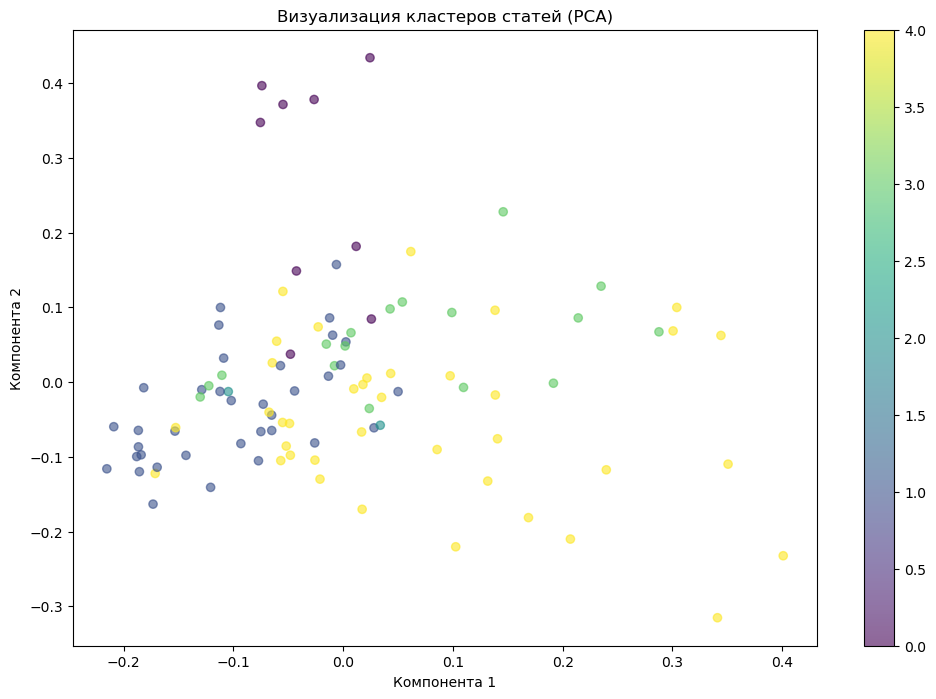

In [110]:
from sklearn.decomposition import PCA

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(tfidf_matrix)
df['cluster'] = clusters

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('Визуализация кластеров статей (PCA)')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.show()

In [112]:
print("\nПримеры статей по кластерам:")
for cluster_num in range(optimal_k):
    print(f"\nКластер {cluster_num}:")
    titles = df[df['cluster'] == cluster_num]['title'].head(3).tolist()
    for i, title in enumerate(titles, 1):
        print(f"{i}. {title}")


Примеры статей по кластерам:

Кластер 0:
1. Патентный анализ аналоговой электроники
2. Китайские CPU и GPU почти догнали TSMC
3. Исследование кремниевых кристаллов процессора Intel 386

Кластер 1:
1. Пятница — новый выходной? Как страны тестируют четырёхдневку
2. Как прошёл Infra Meetup Wildberries & Russ
3. Архитектура как часть цифровой стратегии предприятия

Кластер 2:
1. Проверка прокуратуры по КИИ: как справиться без бюджета и пройти её успешно
2. «Нанософт» сказал — «Нанософт» сделал. Представляем новые ИИ-модули NSR Specification для инженеров и проектировщиков

Кластер 3:
1. Как обеспечить безопасность ОС Linux по рекомендациям ФСТЭК России
2. Как сокращение полных путей файлов в логах влияет на производительность и размер Браузера
3. DevSecOps практики CUSTIS: социальная инженерия

Кластер 4:
1. Как нейросети помогают при создании кино и сериалов, и почему без человека всё ещё никак
2. Возвращение Ubuntu Touch: как обновление дало вторую жизнь мобильной ОС
3. От нестационарно


Связь кластеров с тематиками:


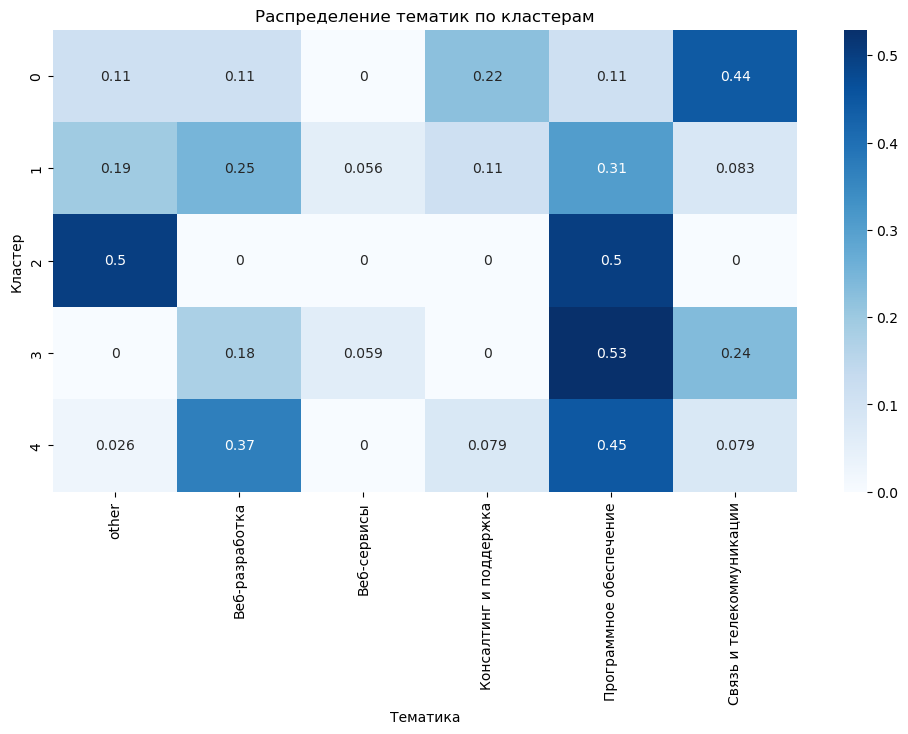

In [114]:
if 'main_hub' in df.columns:
    print("\nСвязь кластеров с тематиками:")
    cross_tab = pd.crosstab(df['cluster'], df['main_hub'], normalize='index')
    plt.figure(figsize=(12, 6))
    sns.heatmap(cross_tab, annot=True, cmap='Blues')
    plt.title('Распределение тематик по кластерам')
    plt.xlabel('Тематика')
    plt.ylabel('Кластер')
    plt.show()

In [116]:
df.to_csv('habr_articles.csv', index=False)

In [118]:
df.head()

,title,namecompany,description,rating,field,date,textpub,processed_text,processed_title,main_hub,cluster
0,Пятница — новый выходной? Как страны тестируют...,SENSE,SENSE — кадровый системный интегратор,0,"Программное обеспечение, Консалтинг и поддержк...",2025-10-08,"Кофе, таски, календарь забитый встречами и ощу...",кофе таски календарь забитый встречами ощущени...,пятница новый выходной страны тестируют четырё...,Программное обеспечение,1
1,Патентный анализ аналоговой электроники,Online patent,Ваш личный патентный офис,0,"Консалтинг и поддержка, Веб-сервисы",2025-10-08,Аналоговая электроника — это отрасль электрони...,аналоговая электроника отрасль электроники кот...,патентный анализ аналоговой электроники,Консалтинг и поддержка,0
2,Как прошёл Infra Meetup Wildberries & Russ,Wildberries & Russ,Компания,0,"Электронная коммерция, Веб-сервисы",2025-10-08,Три инженерных доклада о мощной инфраструктуре...,инженерных доклада мощной инфраструктуре wildb...,прошёл infra meetup wildberries rus,Веб-сервисы,1
3,Как нейросети помогают при создании кино и сер...,Национальная Медиа Группа,Крупнейший в России частный медиахолдинг,0,"Веб-разработка, СМИ, Веб-сервисы",2025-10-08,"Привет, Хабр! Меня зовут Артём Орлов, я директ...",привет хабр зовут артём орлов директор инновац...,нейросети помогают создании кино сериалов поче...,Веб-разработка,4
4,Возвращение Ubuntu Touch: как обновление дало ...,МТС,Про жизнь и развитие в IT,0,"Связь и телекоммуникации, Мобильные технологии...",2025-10-08,Ubuntu Touch — мобильная версия Ubuntu для тех...,ubuntu touch мобильная версия ubuntu хочет упр...,возвращение ubuntu touch обновление дало втору...,Связь и телекоммуникации,4
